In [142]:
import os
os.chdir('../HW4')

In [143]:
!ls data

11785-spring2021-hw4p2.zip   s21_sample.csv  train_std.npy
dev.npy			     test.npy	     train_transcripts_cleaned.txt
dev_transcripts_cleaned.txt  train_mean.npy  train_transcripts.npy
dev_transcripts.npy	     train.npy


In [144]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.color_palette("flare", as_cmap=True)

In [145]:
train_spectrograms = np.load('./data/train.npy', allow_pickle=True)
dev_spectrograms = np.load('./data/dev.npy', allow_pickle=True)

train_text = np.load('./data/train_transcripts.npy', allow_pickle=True)
dev_text = np.load('./data/dev_transcripts.npy', allow_pickle=True)

Average utterance length:
	Train Set: 1015.705
	Dev Set: 574.659


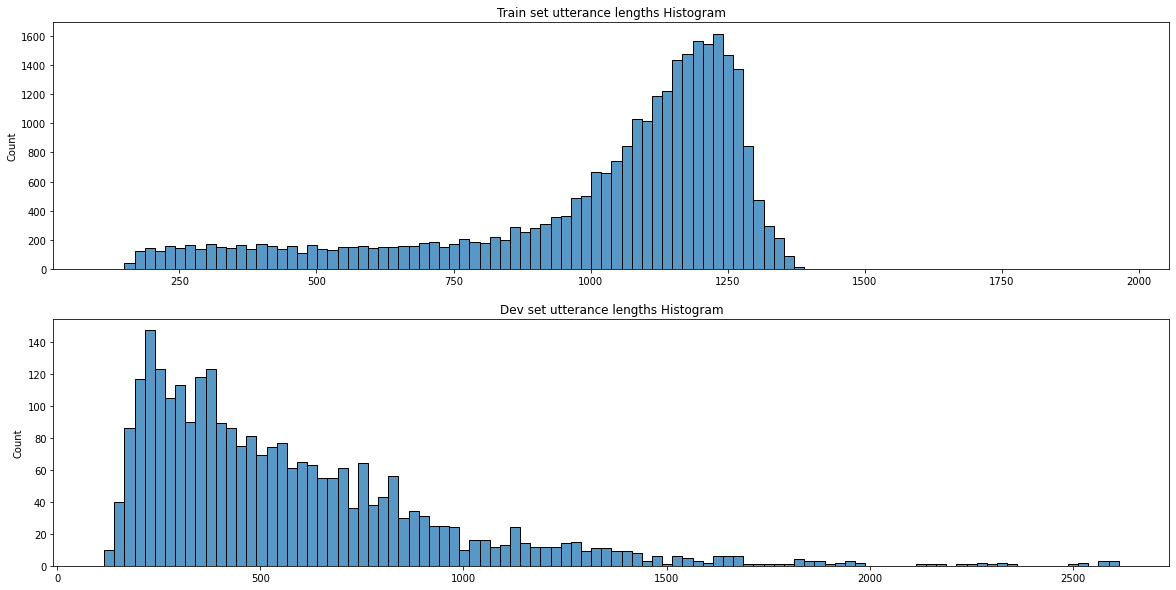

In [146]:
# let's check utterance lengths 
train_utt_lengths = []
dev_utt_lengths = []
for i, spec in enumerate(train_spectrograms):
    train_utt_lengths.append(spec.shape[0])
for i, spec in enumerate(dev_spectrograms):
    dev_utt_lengths.append(spec.shape[0])
print(f"Average utterance length:\n\tTrain Set: {sum(train_utt_lengths)/len(train_utt_lengths):3.3f}\n\tDev Set: {sum(dev_utt_lengths)/len(dev_utt_lengths):3.3f}")
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
sns.histplot(train_utt_lengths, bins=100)
_ = plt.title("Train set utterance lengths Histogram")
plt.subplot(2, 1, 2)
sns.histplot(dev_utt_lengths, bins=100)
_ = plt.title("Dev set utterance lengths Histogram")
plt.savefig('predictions/utt_lens.png')

Average transcripts length:
	Train Set: 184.653
	Dev Set: 106.717


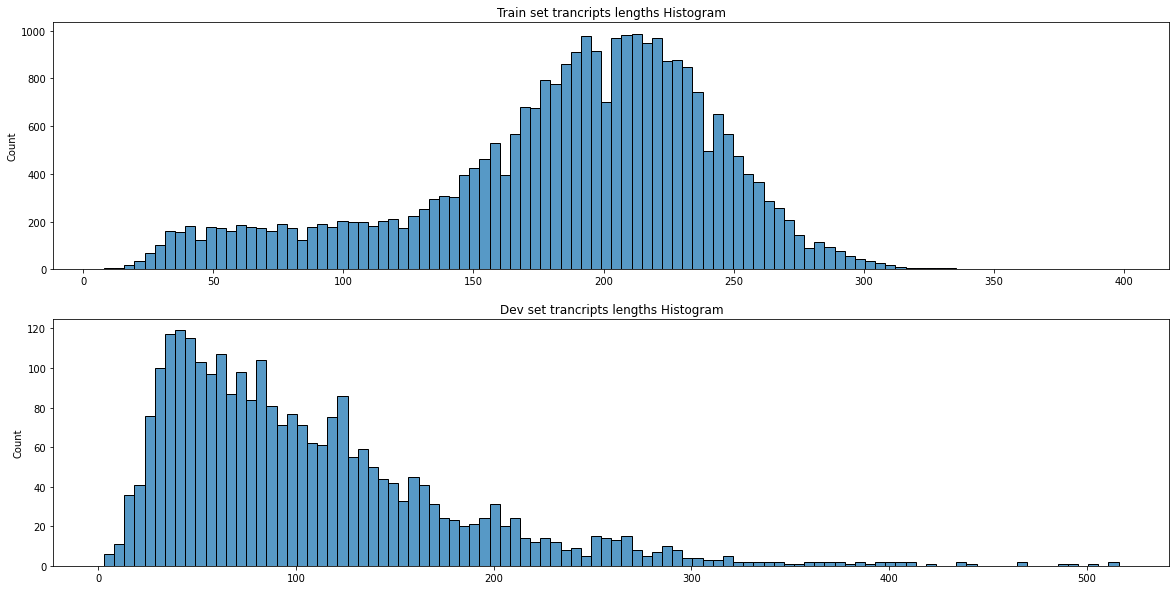

In [148]:
# let's check utterance lengths transcripts
train_utt_trans_lengths = []
dev_utt_trans_lengths = []
for i, spec in enumerate(train_spectrograms):
    train_utt_trans_lengths.append(len(get_transcript(i)))
    
for i, spec in enumerate(dev_spectrograms):
    dev_utt_trans_lengths.append(len(get_transcript_dev(i)))
    
print(f"Average transcripts length:\n\tTrain Set: {sum(train_utt_trans_lengths)/len(train_utt_trans_lengths):3.3f}\n\tDev Set: {sum(dev_utt_trans_lengths)/len(dev_utt_trans_lengths):3.3f}")
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
sns.histplot(train_utt_trans_lengths, bins=100)
_ = plt.title("Train set trancripts lengths Histogram")
plt.subplot(2, 1, 2)
sns.histplot(dev_utt_trans_lengths, bins=100)
_ = plt.title("Dev set trancripts lengths Histogram")
plt.savefig('predictions/utt_trans_lens.png')

In [149]:
# size of this dataset we are dealing with
NUMBER_OF_FRAME_PER_HR = 3600*100 
print(f"Durations:")
train_dur = sum(train_utt_lengths)/NUMBER_OF_FRAME_PER_HR
dev_dur = sum(dev_utt_lengths)/NUMBER_OF_FRAME_PER_HR
print(f"\tTrain Set:\t{train_dur:3.3f} Hrs")
print(f"\tDev Set:\t{dev_dur:3.3f} Hrs")

Durations:
	Train Set:	80.520 Hrs
	Dev Set:	4.315 Hrs


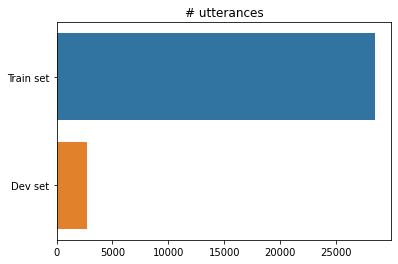

In [150]:
sns.barplot(x=[len(train_spectrograms), len(dev_spectrograms)], y=['Train set', 'Dev set'], orient='h')
_ = plt.title("# utterances")

In [151]:
# sns.barplot(x=[train_dur, dev_dur], y=['Train set', 'Dev set'], orient='h')

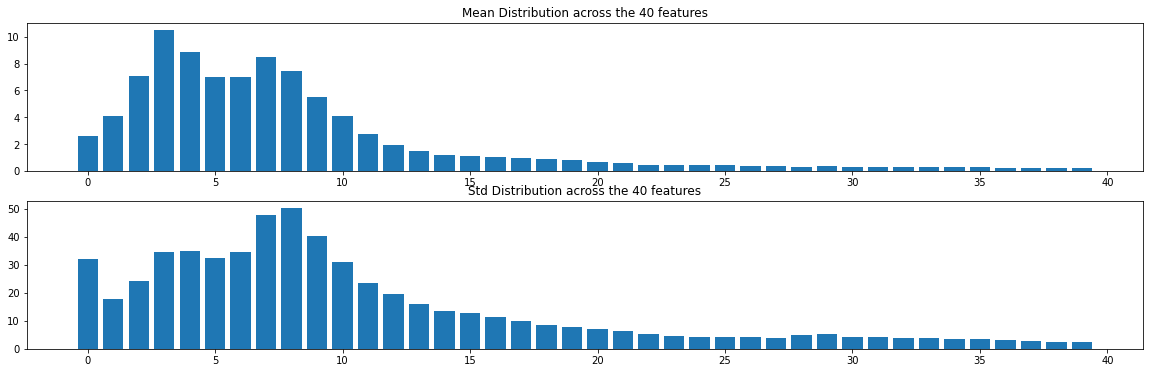

In [152]:
train_mean = np.load('data/train_mean.npy')
plt.figure(figsize=(20, 6))
plt.subplot(2,1,1)
plt.bar(np.arange(40), train_mean)
plt.title("Mean Distribution across the 40 features")
plt.subplot(2,1,2)
train_std = np.load('data/train_std.npy')
plt.bar(np.arange(40), train_std)
plt.title("Std Distribution across the 40 features")

plt.savefig("predictions/mean_std_features.png")

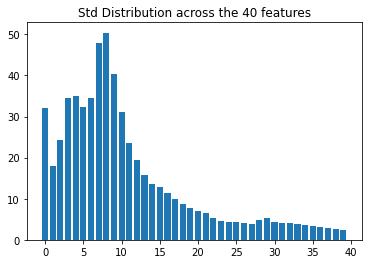

In [154]:
train_std = np.load('data/train_std.npy')
plt.bar(np.arange(40), train_std)
plt.title("Std Distribution across the 40 features")
plt.savefig("predictions/std_features.png")

In [155]:
# let's plot what a few spectrograms look like from train and dev

In [156]:
def get_transcript(i):
    return (b' '.join(train_text[i].tolist())).decode()
def get_transcript_dev(i):
    return (b' '.join(dev_text[i].tolist())).decode()

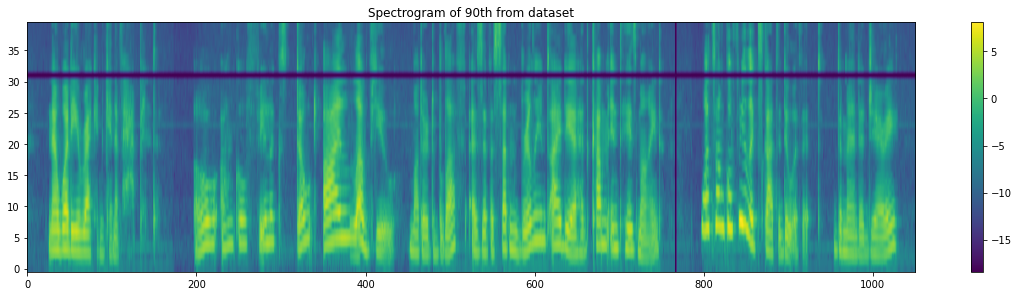

90 now what d'ye reckon can have happened oh uncle felix don't i love you muttered bluff as if a sudden brilliant idea had come into his mind what's uncle felix got to do with it demanded jerry


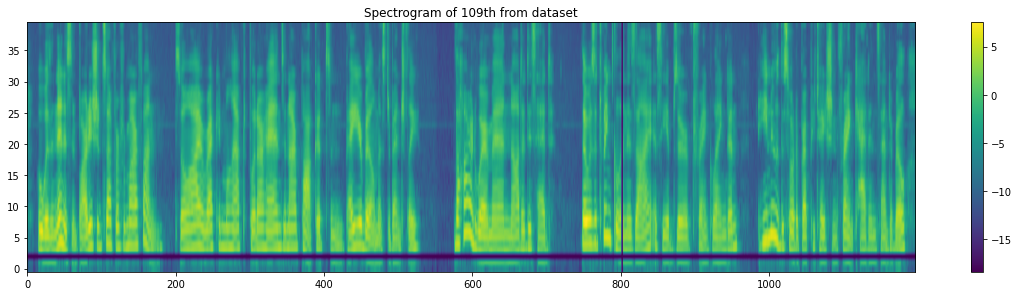

109 who was an innocent party should suffer from our fun so i reckon we'll have to put our hands in our pockets and pay your bill mister benchley the hardware man nodded his head there was a twinkle in his eye as he observed frank langdon he knew the sort of reputation frank had in centerville


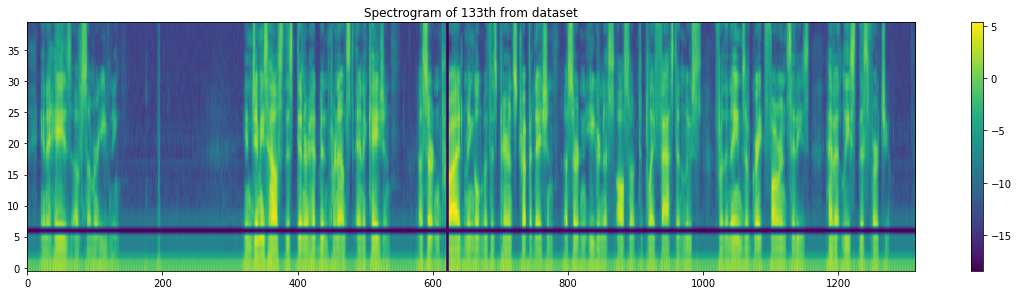

133 in a haze of summer evening in jimmy's house this dinner had been pronounced an occasion a certain pride mingled with his parents trepidation a certain eagerness also to play fast and loose for the names of great foreign cities have at least this virtue


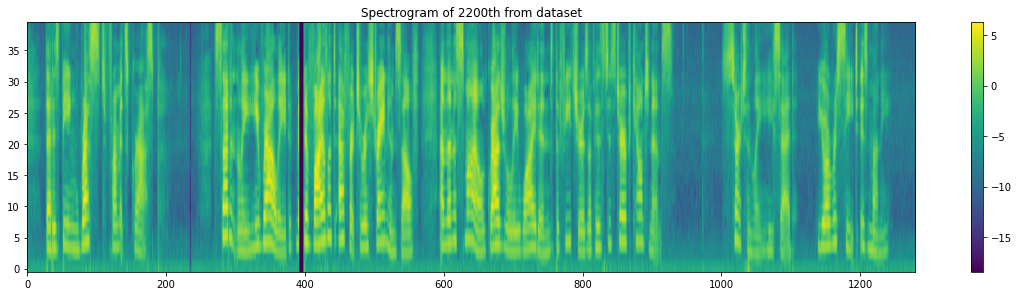

2200 that is being wrested from its grasp suddenly he rallied made a violent effort to restrain himself and then a smile gradually widened the features of his disturbed countenance certainly he said your receipt is money


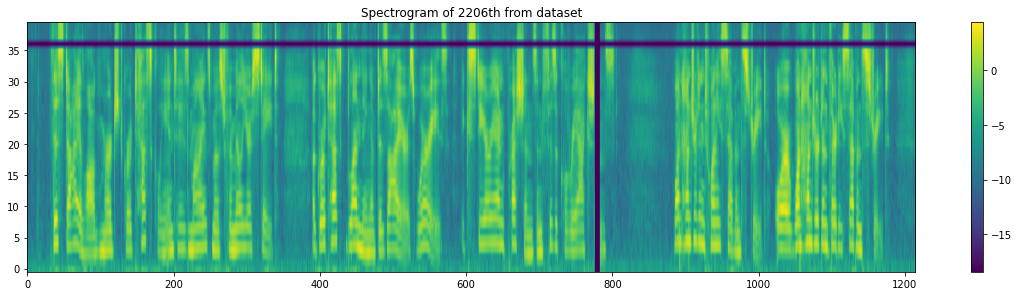

2206 this dialogue merged grotesquely into his mind's most familiar state a grotesque blending of desires worries exterior impressions and physical reactions one hundred and twenty seventh street or one hundred and thirty seventh street


In [113]:
k = 2200
for i in [90, 109, 133, 2200, 2206]:
    Y = np.log(1e-8 + train_spectrograms[i].T)
    plt.figure(figsize=(16, 4))
    plt.imshow(Y, aspect='auto', origin='lower')
    plt.colorbar()
    plt.tight_layout()
    plt.title(f"Spectrogram of {i}th from dataset")
    plt.savefig(f'predictions/spectrogram_{i}.png')
    plt.show()
    print(i, get_transcript(i))

import librosa

S = librosa.feature.inverse.mel_to_stft(train_spectrograms[1].T, sr=48000)

y = librosa.griffinlim(S)

import IPython.display as ipd
def play(y, sr=16000):
    return ipd.Audio(y, rate=sr)


play(y, sr=24000)

import pandas as pd

hw4p2_leaderboard_data = pd.read_csv('predictions/11785-spring2021-hw3p2-publicleaderboard.csv')

hw4p2_leaderboard_data

hw4p2_leaderboard_data_clean=hw4p2_leaderboard_data[hw4p2_leaderboard_data['Score']<60]

_ = plt.hist(hw4p2_leaderboard_data_clean['Score'], bins=40)
plt.title("HW3 Leaderboard Histogram")
plt.ylabel("")
plt.xlabel("")